In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#data sets
en = "Team_player_data/cleaned/EPL.csv"
spain = "Team_player_data/cleaned/Liga.csv"
it = "Team_player_data/cleaned/SerieA.csv"

eng_df = pd.read_csv(en)
spain_df = pd.read_csv(spain)
it_df = pd.read_csv(it)

final_df = pd.concat([eng_df,spain_df,it_df])
final_df.describe()

,Ranking,Year,Points,Goals+,Goals-,avg age,avg heights (cm),avg weight (kg),avg player rating,avg player value (EU),avg player wage
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000
mean,10.360000,2017.000000,52.380000,33.920000,28.546667,25.146267,181.958333,75.724533,71.985800,5.943353e+06,30263.513333
std,5.725353,1.416576,18.017149,15.110084,14.455600,1.137406,1.424876,1.621078,3.779153,6.281174e+06,33020.036679
min,1.000000,2015.000000,16.000000,10.000000,6.000000,22.550000,178.120000,71.740000,59.650000,0.000000e+00,0.000000
25%,5.000000,2016.000000,40.000000,24.000000,19.000000,24.345000,181.037500,74.495000,69.547500,1.257226e+06,4726.250000
50%,10.000000,2017.000000,48.500000,30.000000,25.000000,25.080000,181.970000,75.650000,72.050000,4.282316e+06,22008.500000
75%,15.000000,2018.000000,63.250000,40.000000,33.250000,25.815000,182.960000,76.882500,74.352500,7.855902e+06,43120.000000
max,20.000000,2019.000000,100.000000,102.000000,85.000000,28.330000,185.330000,80.300000,82.380000,3.179808e+07,188833.000000


In [5]:
#divide the data into attributes (independent variable X), labels(dependent variable, the prediction, y)
X = final_df[["Goals+","Goals-","avg player rating","avg player wage"]]
y = final_df["Ranking"]
yy = final_df["Points"]

In [6]:
#Execute the following code to divide our data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, yy_train, yy_test = train_test_split(X, yy, test_size=0.2, random_state=0)

In [8]:
'''
Linear regression
'''
#train the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [9]:
#the regression model has to find the most optimal coefficients for all the attributes. 
#To see what #coefficients our regression model has chosen, execute the following script:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Goals+,-0.232149
Goals-,0.221088
avg player rating,-0.323127
avg player wage,0.000003


[This means :] 
* for an increase of 1 unit in goals+, there is a decrease of 0.228 in ranking means closer from the top.
* for an increase of 1 unit in goals-, there is a increase of 0.22 in ranking means further from the top.
* for an increase of 1 unit in player_rate, there is a decrease of 0.32 in ranking means closer from the top.

In [10]:
#predictions
y_pred = regressor.predict(X_test)
#compare the predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(5)

,Actual,Predicted
8,9,12.292814
88,9,11.820744
12,13,16.364421
21,2,4.303570
39,20,17.234902


In [12]:
#Evaluation of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.3701180671722466
Mean Squared Error: 9.876294169505078
Root Mean Squared Error: 3.1426571829432937


In [230]:
'''
Logistic regression
'''
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train, y_train)
# predict the response values for the observations in X
y_pred2 = logreg.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df.head(5)

,Actual,Predicted
8,9,15
88,9,17
12,13,18
21,2,2
39,20,20


In [231]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred2))

0.06666666666666667


In [232]:
'''
KNN
'''
from sklearn.neighbors import KNeighborsClassifier
ks = {}
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred3 = knn.predict(X_test)
    ks[k] = metrics.accuracy_score(y_test, y_pred3)


<AxesSubplot:>

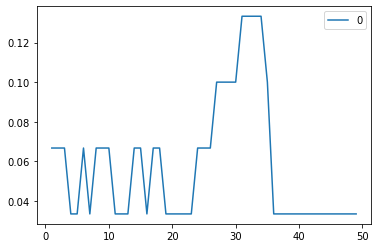

In [233]:
ks_df = pd.DataFrame.from_dict(ks, orient='index')
ks_df.plot()

In [258]:
'''
Rainforest
'''
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.1025
Mean Squared Error: 9.447208333333334
Root Mean Squared Error: 3.073631131631337
